In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from patsy import dmatrix
%matplotlib inline

In [2]:
sp = pd.read_csv(r'../DataSets/spy.csv')

In [3]:
sp.sort_values('Date', inplace=True)

In [4]:
sp.reset_index(drop=True, inplace=True)

In [5]:
sp

,Date,Open,High,Low,Close,Volume,Adj Close,Daily Change,Overnight Change,Gap Pct,...,Signal_990,Signal_991,Signal_992,Signal_993,Signal_994,Signal_995,Signal_996,Signal_997,Signal_998,Signal_999
0,2010-01-04,112.370003,113.389999,111.510002,113.330002,118944600,100.323436,0.959999,NaN,NaN,...,0,1,0,1,1,0,0,1,1,0
1,2010-01-05,113.260002,113.680000,112.849998,113.629997,111579900,100.589001,0.369995,-0.070000,-0.061767,...,0,1,0,0,0,0,1,1,0,0
2,2010-01-06,113.519997,113.989998,113.430000,113.709999,116074400,100.659822,0.190002,-0.110000,-0.096805,...,0,0,1,0,1,1,1,0,1,0
3,2010-01-07,113.500000,114.330002,113.180000,114.190002,131091100,101.084736,0.690002,-0.209999,-0.184679,...,0,1,0,0,1,1,0,0,0,0
4,2010-01-08,113.889999,114.620003,113.660004,114.570000,126402800,101.421122,0.680001,-0.300003,-0.262723,...,0,1,1,0,0,0,1,1,1,0
5,2010-01-11,115.080002,115.129997,114.239998,114.730003,106375700,101.562763,-0.349999,0.510002,0.445144,...,1,1,0,1,1,0,0,1,1,0
6,2010-01-12,113.970001,114.209999,113.220001,113.660004,163333500,100.615564,-0.309997,-0.760002,-0.662427,...,0,0,0,1,0,1,0,0,1,1
7,2010-01-13,113.949997,114.940002,113.370003,114.620003,161822000,101.465387,0.670006,0.289993,0.255141,...,0,0,0,0,0,1,0,1,1,0
8,2010-01-14,114.489998,115.139999,114.419998,114.930000,115718800,101.739807,0.440002,-0.130005,-0.113423,...,0,1,0,0,1,1,1,0,1,1
9,2010-01-15,114.730003,114.839996,113.199997,113.639999,212283100,100.597856,-1.090004,-0.199997,-0.174016,...,0,0,0,0,1,1,1,1,1,1


In [6]:
all_dates = sp[['Date']]

In [7]:
tkr_index = [x for x in all_dates.index if x % 15 == 0]

In [8]:
all_dates.ix[tkr_index]

/Users/palance/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Date
0,2010-01-04
15,2010-01-26
30,2010-02-17
45,2010-03-10
60,2010-03-31
75,2010-04-22
90,2010-05-13
105,2010-06-04
120,2010-06-25
135,2010-07-19


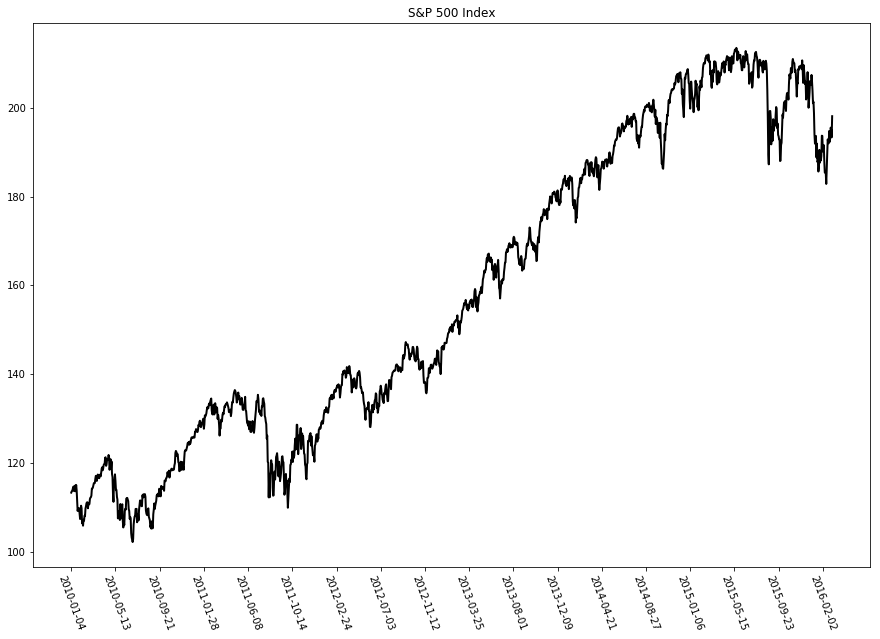

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('S&P 500 Index')
ax.plot(sp['Close'], color='k', linewidth=2)
ax.set_xticks(np.arange(0,len(sp),90));
ax.set_xticklabels([sp['Date'][x] for x in sp[['Date']].index if x % 90 == 0], rotation=-70);

In [10]:
ipos = pd.read_csv(r'../PrivateDatasets/ipo_data.csv', encoding='latin-1')

In [11]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,2016/2/3,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,$24.00,$28.97,$28.32,18.00%,$4.97,$4.32,3,NaN
1,2016/2/3,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,$16.00,$18.00,$18.20,13.75%,$2.00,$2.20,2,NaN
2,2016/2/11,AveXis,AVXS,Goldman Sachs/ Jefferies,$20.00,$18.02,$18.05,-9.75%,($1.98),($1.95),2,Missed
3,2016/2/11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,$8.00,$8.00,$6.64,-17.00%,$0.00,($1.36),1,NaN
4,2016/2/24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,$10.00,$10.01,$10.21,2.10%,$0.01,$0.21,1,NaN
5,2015/1/16,Patriot National,PN,UBS Investment Bank/ BMO Capital Markets/ SunT...,$14.00,$13.49,$13.50,-3.57%,($0.51),($0.50),1,NaN
6,2015/1/27,Zosano Pharma (ZSAN),ZSAN,Ladenburg Thalmann/ Roth Capital Partners,$11.00,$12.16,$11.10,0.91%,$1.16,$0.10,1,NaN
7,2015/1/28,Ascendis Pharma A/S,ASND,BofA Merrill Lynch/ Leerink Partners,$18.00,$21.50,$18.83,4.61%,$3.50,$0.83,2,NaN
8,2015/1/29,Entellus Medical,ENTL,BofA Merrill Lynch/ Piper Jaffray,$17.00,$19.26,$22.00,29.41%,$2.26,$5.00,2,NaN
9,2015/1/29,Flex Pharma,FLKS,Jefferies/ Piper Jaffray,$16.00,$19.00,$14.95,-6.56%,$3.00,($1.05),2,NaN


In [12]:
ipos = ipos.applymap(lambda x: x if not '$' in str(x) else x.replace('$',''))
ipos = ipos.applymap(lambda x: x if not '%' in str(x) else x.replace('%',''))
ipos = ipos.applymap(lambda x: x if not '(' in str(x) else x.replace('(',''))
ipos = ipos.applymap(lambda x: x if not ')' in str(x) else x.replace(')',''))

In [13]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,2016/2/3,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3,NaN
1,2016/2/3,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2,NaN
2,2016/2/11,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,1.98,1.95,2,Missed
3,2016/2/11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,1.36,1,NaN
4,2016/2/24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1,NaN
5,2015/1/16,Patriot National,PN,UBS Investment Bank/ BMO Capital Markets/ SunT...,14.00,13.49,13.50,-3.57,0.51,0.50,1,NaN
6,2015/1/27,Zosano Pharma ZSAN,ZSAN,Ladenburg Thalmann/ Roth Capital Partners,11.00,12.16,11.10,0.91,1.16,0.10,1,NaN
7,2015/1/28,Ascendis Pharma A/S,ASND,BofA Merrill Lynch/ Leerink Partners,18.00,21.50,18.83,4.61,3.50,0.83,2,NaN
8,2015/1/29,Entellus Medical,ENTL,BofA Merrill Lynch/ Piper Jaffray,17.00,19.26,22.00,29.41,2.26,5.00,2,NaN
9,2015/1/29,Flex Pharma,FLKS,Jefferies/ Piper Jaffray,16.00,19.00,14.95,-6.56,3.00,1.05,2,NaN


In [14]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 12 columns):
Date                       1129 non-null object
Issuer                     1129 non-null object
Symbol                     1129 non-null object
Lead/Joint-Lead Manager    1129 non-null object
Offer Price                1129 non-null object
Opening Price              1129 non-null object
1st Day Close              1129 non-null object
1st Day % Px Chng          1129 non-null object
$ Chg Opening              1129 non-null object
$ Chg Close                1129 non-null object
Star Ratings               1129 non-null object
Performed                  112 non-null object
dtypes: object(12)
memory usage: 105.9+ KB


In [15]:
ipos.replace('N/C',0, inplace=True)

In [16]:
# ipos[ipos['Date']=='11/120']         # 当出现错误时，为什么不修改数据，而是修改代码呢？
# ipos.loc[1660, 'Date'] = pd.to_datetime('2012-11-20')

In [17]:
ipos['Date'] = pd.to_datetime(ipos['Date'])
ipos['Offer Price'] = ipos['Offer Price'].astype('float')
ipos['Opening Price'] = ipos['Opening Price'].astype('float')
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float')
ipos['1st Day % Px Chng '] = ipos['1st Day % Px Chng '].astype('float')
ipos['$ Chg Close'] = ipos['$ Chg Close'].astype('float')
ipos['$ Chg Opening'] = ipos['$ Chg Opening'].astype('float')
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')

In [18]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 12 columns):
Date                       1129 non-null datetime64[ns]
Issuer                     1129 non-null object
Symbol                     1129 non-null object
Lead/Joint-Lead Manager    1129 non-null object
Offer Price                1129 non-null float64
Opening Price              1129 non-null float64
1st Day Close              1129 non-null float64
1st Day % Px Chng          1129 non-null float64
$ Chg Opening              1129 non-null float64
$ Chg Close                1129 non-null float64
Star Ratings               1129 non-null int64
Performed                  112 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 105.9+ KB


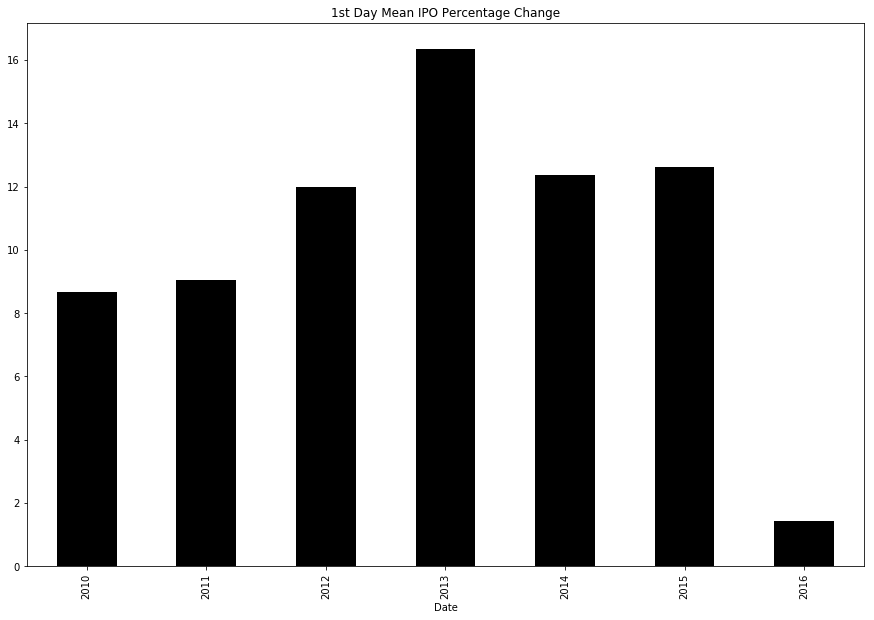

In [19]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng ']\
.mean().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Mean IPO Percentage Change')

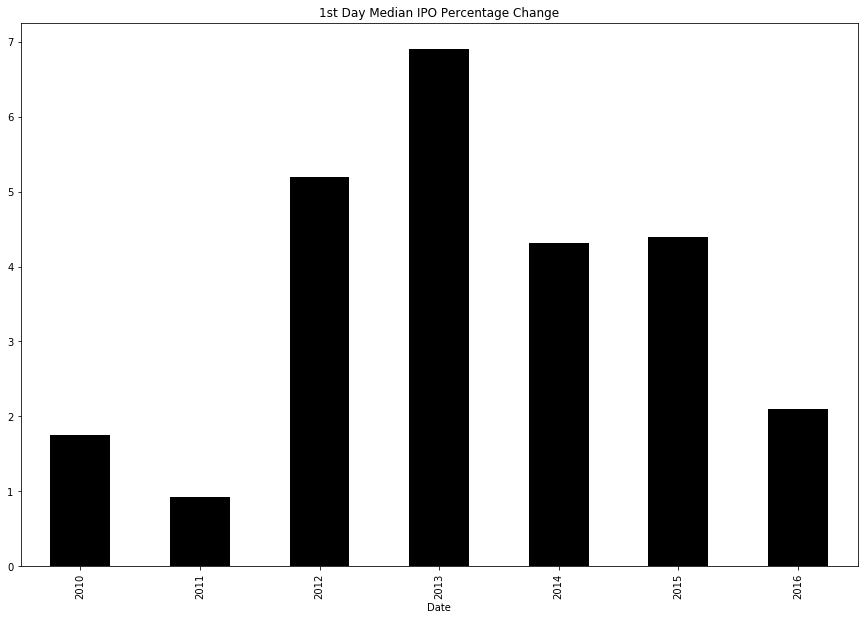

In [20]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng ']\
.median().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Median IPO Percentage Change')

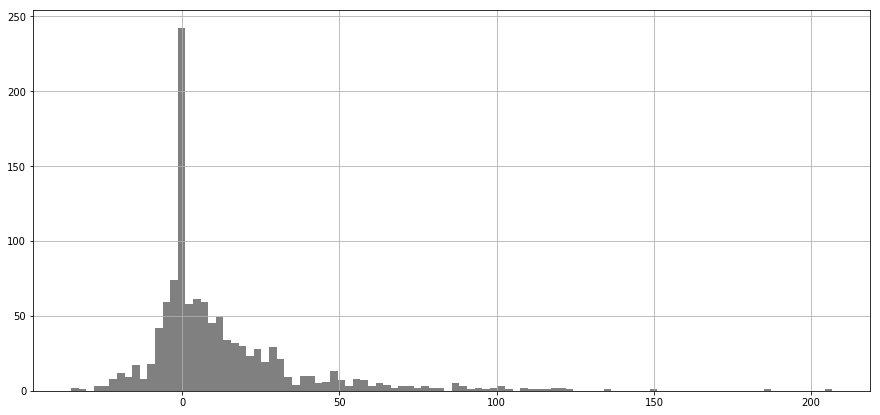

In [21]:
ipos['1st Day % Px Chng '].hist(figsize=(15,7), bins=100, color='grey')

In [22]:
ipos['1st Day % Px Chng '].describe()

count    1129.000000
mean       12.166608
std        25.171224
min       -35.220000
25%        -0.590000
50%         3.750000
75%        18.670000
max       206.670000
Name: 1st Day % Px Chng , dtype: float64

In [23]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

In [24]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
0,2016-02-03,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3,NaN,-0.65,-2.243700
1,2016-02-03,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2,NaN,0.20,1.111111
2,2016-02-11,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,1.98,1.95,2,Missed,-0.03,-0.166482
3,2016-02-11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,1.36,1,NaN,1.36,17.000000
4,2016-02-24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1,NaN,0.20,1.998002
5,2015-01-16,Patriot National,PN,UBS Investment Bank/ BMO Capital Markets/ SunT...,14.00,13.49,13.50,-3.57,0.51,0.50,1,NaN,-0.01,-0.074129
6,2015-01-27,Zosano Pharma ZSAN,ZSAN,Ladenburg Thalmann/ Roth Capital Partners,11.00,12.16,11.10,0.91,1.16,0.10,1,NaN,-1.06,-8.717105
7,2015-01-28,Ascendis Pharma A/S,ASND,BofA Merrill Lynch/ Leerink Partners,18.00,21.50,18.83,4.61,3.50,0.83,2,NaN,-2.67,-12.418605
8,2015-01-29,Entellus Medical,ENTL,BofA Merrill Lynch/ Piper Jaffray,17.00,19.26,22.00,29.41,2.26,5.00,2,NaN,2.74,14.226376
9,2015-01-29,Flex Pharma,FLKS,Jefferies/ Piper Jaffray,16.00,19.00,14.95,-6.56,3.00,1.05,2,NaN,-1.95,-10.263158


In [25]:
ipos['% Chg Open to Close'].describe()

count    1129.000000
mean        2.147852
std        10.001772
min      -106.601942
25%        -1.451613
50%         0.555556
75%         5.000000
max       113.333333
Name: % Chg Open to Close, dtype: float64

In [26]:
ipos[ipos['% Chg Open to Close']<-98]

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
158,2015-11-20,Duluth Holdings,DLTH,William Blair/ Baird/ Raymond James/ BMO Capit...,12.0,5.15,13.36,11.33,6.85,1.36,1,NaN,-5.49,-106.601942


In [27]:
ipos.loc[440, '$ Chg Opening'] = .09

In [28]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

In [29]:
ipos['% Chg Open to Close'].describe()

count    1129.000000
mean        2.158959
std        10.000941
min      -106.601942
25%        -1.428571
50%         0.558140
75%         5.000000
max       113.333333
Name: % Chg Open to Close, dtype: float64

In [30]:
ipos[ipos['% Chg Open to Close']<-45]

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
158,2015-11-20,Duluth Holdings,DLTH,William Blair/ Baird/ Raymond James/ BMO Capit...,12.00,5.15,13.36,11.33,6.85,1.36,1,NaN,-5.49,-106.601942
1012,2010-05-05,Douglas Dynamics,PLOW,Credit Suisse/ Oppenheimer,11.25,22.26,11.29,0.36,11.01,0.04,1,NaN,-10.97,-49.281222


In [31]:
ipos.loc[1264, '$ Chg Opening'] = .01
ipos.loc[1264, 'Opening Price'] = 11.26

In [32]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

In [33]:
ipos['% Chg Open to Close'].describe()

count    1129.000000
mean        2.158959
std        10.000941
min      -106.601942
25%        -1.428571
50%         0.558140
75%         5.000000
max       113.333333
Name: % Chg Open to Close, dtype: float64

In [34]:
ipos.sort_values('% Chg Open to Close')

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
158,2015-11-20,Duluth Holdings,DLTH,William Blair/ Baird/ Raymond James/ BMO Capit...,12.00,5.15,13.36,11.33,6.85,1.36,1.0,NaN,-5.49,-106.601942
1012,2010-05-05,Douglas Dynamics,PLOW,Credit Suisse/ Oppenheimer,11.25,22.26,11.29,0.36,11.01,0.04,1.0,NaN,-10.97,-49.281222
922,2011-07-20,Zillow,Z,Citi,20.00,60.00,35.77,78.85,40.00,15.77,3.0,NaN,-24.23,-40.383333
389,2014-10-03,Yodlee,YDLE,Goldman Sachs/ Credit Suisse/ BofA Merrill Lynch,12.00,18.81,13.44,12.00,6.81,1.44,3.0,NaN,-5.37,-28.548644
368,2014-09-18,ProQR Therapeutics B.V.,PRQR,Leerink Partners/ Deutsche Bank Securities,13.00,19.90,14.73,13.31,6.90,1.73,2.0,NaN,-5.17,-25.979899
211,2014-03-19,Paylocity Holding,PCTY,Deutsche Bank Securities/ BofA Merrill Lynch/ ...,17.00,31.00,24.04,41.41,14.00,7.04,3.0,NaN,-6.96,-22.451613
367,2014-09-18,Foamix Ltd.,FOMX,Barclays/ Cowen and Company,6.00,8.00,6.22,3.67,2.00,0.22,1.0,NaN,-1.78,-22.250000
623,2013-10-17,ADMA Biologics,ADMA,Oppenheimer & Co.,8.50,7.00,8.55,0.59,1.50,0.05,1.0,NaN,-1.45,-20.714286
559,2013-07-25,Onconova Therapeutics,ONTX,Citigroup/ Leerink Swann,15.00,25.00,19.88,32.53,10.00,4.88,3.0,NaN,-5.12,-20.480000
482,2013-03-27,NV5 Holdings,NVEE.U,Roth Capital Partners,6.00,8.00,6.42,7.00,2.00,0.42,1.0,NaN,-1.58,-19.750000


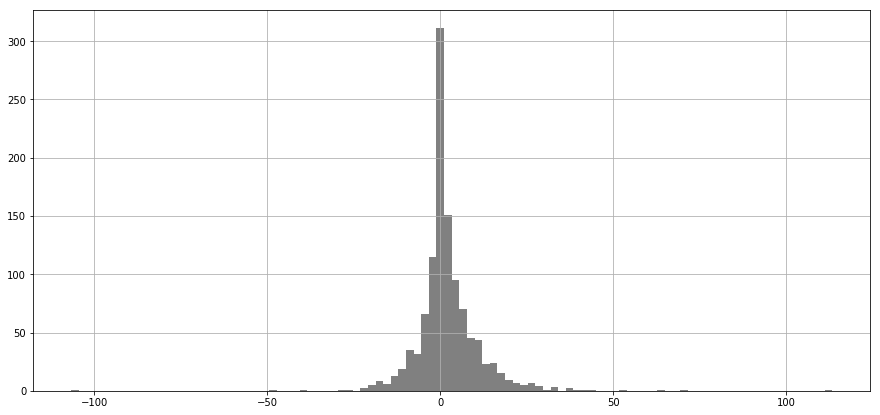

In [35]:
ipos['% Chg Open to Close'].hist(figsize=(15,7), bins=100, color='grey')

In [36]:
ipos[ipos['Date']>='2015-01-01']['% Chg Open to Close'].describe()

count    162.000000
mean       1.863347
std       13.187147
min     -106.601942
25%       -2.000634
50%        0.788889
75%        5.029167
max       63.903061
Name: % Chg Open to Close, dtype: float64

In [37]:
ipos[ipos['Date']>='2015-01-01']['$ Chg Open to Close'].sum()

64.24

In [38]:
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']>0)]['$ Chg Open to Close'].describe()

count    99.000000
mean      1.282222
std       2.541689
min       0.010000
25%       0.200000
50%       0.610000
75%       1.245000
max      20.040000
Name: $ Chg Open to Close, dtype: float64

In [39]:
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']<0)]['$ Chg Open to Close'].describe()

count    55.000000
mean     -1.140000
std       1.317571
min      -6.160000
25%      -1.485000
50%      -0.720000
75%      -0.220000
max      -0.010000
Name: $ Chg Open to Close, dtype: float64

In [40]:
sp

,Date,Open,High,Low,Close,Volume,Adj Close,Daily Change,Overnight Change,Gap Pct,...,Signal_990,Signal_991,Signal_992,Signal_993,Signal_994,Signal_995,Signal_996,Signal_997,Signal_998,Signal_999
0,2010-01-04,112.370003,113.389999,111.510002,113.330002,118944600,100.323436,0.959999,NaN,NaN,...,0,1,0,1,1,0,0,1,1,0
1,2010-01-05,113.260002,113.680000,112.849998,113.629997,111579900,100.589001,0.369995,-0.070000,-0.061767,...,0,1,0,0,0,0,1,1,0,0
2,2010-01-06,113.519997,113.989998,113.430000,113.709999,116074400,100.659822,0.190002,-0.110000,-0.096805,...,0,0,1,0,1,1,1,0,1,0
3,2010-01-07,113.500000,114.330002,113.180000,114.190002,131091100,101.084736,0.690002,-0.209999,-0.184679,...,0,1,0,0,1,1,0,0,0,0
4,2010-01-08,113.889999,114.620003,113.660004,114.570000,126402800,101.421122,0.680001,-0.300003,-0.262723,...,0,1,1,0,0,0,1,1,1,0
5,2010-01-11,115.080002,115.129997,114.239998,114.730003,106375700,101.562763,-0.349999,0.510002,0.445144,...,1,1,0,1,1,0,0,1,1,0
6,2010-01-12,113.970001,114.209999,113.220001,113.660004,163333500,100.615564,-0.309997,-0.760002,-0.662427,...,0,0,0,1,0,1,0,0,1,1
7,2010-01-13,113.949997,114.940002,113.370003,114.620003,161822000,101.465387,0.670006,0.289993,0.255141,...,0,0,0,0,0,1,0,1,1,0
8,2010-01-14,114.489998,115.139999,114.419998,114.930000,115718800,101.739807,0.440002,-0.130005,-0.113423,...,0,1,0,0,1,1,1,0,1,1
9,2010-01-15,114.730003,114.839996,113.199997,113.639999,212283100,100.597856,-1.090004,-0.199997,-0.174016,...,0,0,0,0,1,1,1,1,1,1


In [41]:
def get_week_chg(ipo_dt):
    try:
        day_ago_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        week_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 16
        chg = (sp.iloc[day_ago_idx]['Close'] - \
               sp.iloc[week_ago_idx]['Close'])/(sp.iloc[week_ago_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt.date())

In [42]:
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

error NaT


In [43]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
0,2016-02-03,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3.0,NaN,-0.65,-2.243700,-1.015042
1,2016-02-03,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2.0,NaN,0.20,1.111111,-1.015042
2,2016-02-11,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,1.98,1.95,2.0,Missed,-0.03,-0.166482,-0.204681
3,2016-02-11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,1.36,1.0,NaN,1.36,17.000000,-0.204681
4,2016-02-24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1.0,NaN,0.20,1.998002,-0.686799
5,2015-01-16,Patriot National,PN,UBS Investment Bank/ BMO Capital Markets/ SunT...,14.00,13.49,13.50,-3.57,0.51,0.50,1.0,NaN,-0.01,-0.074129,-4.202164
6,2015-01-27,Zosano Pharma ZSAN,ZSAN,Ladenburg Thalmann/ Roth Capital Partners,11.00,12.16,11.10,0.91,1.16,0.10,1.0,NaN,-1.06,-8.717105,0.009738
7,2015-01-28,Ascendis Pharma A/S,ASND,BofA Merrill Lynch/ Leerink Partners,18.00,21.50,18.83,4.61,3.50,0.83,2.0,NaN,-2.67,-12.418605,0.505653
8,2015-01-29,Entellus Medical,ENTL,BofA Merrill Lynch/ Piper Jaffray,17.00,19.26,22.00,29.41,2.26,5.00,2.0,NaN,2.74,14.226376,0.160140
9,2015-01-29,Flex Pharma,FLKS,Jefferies/ Piper Jaffray,16.00,19.00,14.95,-6.56,3.00,1.05,2.0,NaN,-1.95,-10.263158,0.160140


In [44]:
# ipos[ipos['Date']=='2009-08-01']

In [45]:
# ipos.loc[1175, 'Date'] = pd.to_datetime('2009-08-12')

In [46]:
# ipos[ipos['Date']=='2013-11-16']

In [47]:
# ipos.loc[1865, 'Date'] = pd.to_datetime('2013-11-06')

In [48]:
# ipos[ipos['Date']=='2015-02-21']

In [49]:
# ipos.loc[2251, 'Date'] = pd.to_datetime('2015-05-21')
# ipos.loc[2252, 'Date'] = pd.to_datetime('2015-05-21')

In [50]:
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

error NaT


In [51]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
0,2016-02-03,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3.0,NaN,-0.65,-2.243700,-1.015042
1,2016-02-03,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2.0,NaN,0.20,1.111111,-1.015042
2,2016-02-11,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,1.98,1.95,2.0,Missed,-0.03,-0.166482,-0.204681
3,2016-02-11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,1.36,1.0,NaN,1.36,17.000000,-0.204681
4,2016-02-24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1.0,NaN,0.20,1.998002,-0.686799
5,2015-01-16,Patriot National,PN,UBS Investment Bank/ BMO Capital Markets/ SunT...,14.00,13.49,13.50,-3.57,0.51,0.50,1.0,NaN,-0.01,-0.074129,-4.202164
6,2015-01-27,Zosano Pharma ZSAN,ZSAN,Ladenburg Thalmann/ Roth Capital Partners,11.00,12.16,11.10,0.91,1.16,0.10,1.0,NaN,-1.06,-8.717105,0.009738
7,2015-01-28,Ascendis Pharma A/S,ASND,BofA Merrill Lynch/ Leerink Partners,18.00,21.50,18.83,4.61,3.50,0.83,2.0,NaN,-2.67,-12.418605,0.505653
8,2015-01-29,Entellus Medical,ENTL,BofA Merrill Lynch/ Piper Jaffray,17.00,19.26,22.00,29.41,2.26,5.00,2.0,NaN,2.74,14.226376,0.160140
9,2015-01-29,Flex Pharma,FLKS,Jefferies/ Piper Jaffray,16.00,19.00,14.95,-6.56,3.00,1.05,2.0,NaN,-1.95,-10.263158,0.160140


In [52]:
sp

,Date,Open,High,Low,Close,Volume,Adj Close,Daily Change,Overnight Change,Gap Pct,...,Signal_990,Signal_991,Signal_992,Signal_993,Signal_994,Signal_995,Signal_996,Signal_997,Signal_998,Signal_999
0,2010-01-04,112.370003,113.389999,111.510002,113.330002,118944600,100.323436,0.959999,NaN,NaN,...,0,1,0,1,1,0,0,1,1,0
1,2010-01-05,113.260002,113.680000,112.849998,113.629997,111579900,100.589001,0.369995,-0.070000,-0.061767,...,0,1,0,0,0,0,1,1,0,0
2,2010-01-06,113.519997,113.989998,113.430000,113.709999,116074400,100.659822,0.190002,-0.110000,-0.096805,...,0,0,1,0,1,1,1,0,1,0
3,2010-01-07,113.500000,114.330002,113.180000,114.190002,131091100,101.084736,0.690002,-0.209999,-0.184679,...,0,1,0,0,1,1,0,0,0,0
4,2010-01-08,113.889999,114.620003,113.660004,114.570000,126402800,101.421122,0.680001,-0.300003,-0.262723,...,0,1,1,0,0,0,1,1,1,0
5,2010-01-11,115.080002,115.129997,114.239998,114.730003,106375700,101.562763,-0.349999,0.510002,0.445144,...,1,1,0,1,1,0,0,1,1,0
6,2010-01-12,113.970001,114.209999,113.220001,113.660004,163333500,100.615564,-0.309997,-0.760002,-0.662427,...,0,0,0,1,0,1,0,0,1,1
7,2010-01-13,113.949997,114.940002,113.370003,114.620003,161822000,101.465387,0.670006,0.289993,0.255141,...,0,0,0,0,0,1,0,1,1,0
8,2010-01-14,114.489998,115.139999,114.419998,114.930000,115718800,101.739807,0.440002,-0.130005,-0.113423,...,0,1,0,0,1,1,1,0,1,1
9,2010-01-15,114.730003,114.839996,113.199997,113.639999,212283100,100.597856,-1.090004,-0.199997,-0.174016,...,0,0,0,0,1,1,1,1,1,1


In [53]:
def get_cto_chg(ipo_dt):
    try:
        today_open_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0]
        yday_close_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        chg = (sp.iloc[today_open_idx]['Open'] - \
               sp.iloc[yday_close_idx]['Close'])/(sp.iloc[yday_close_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt)

In [54]:
ipos['SP Close to Open Chg Pct'] = ipos['Date'].map(get_cto_chg)

error NaT


In [55]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct
0,2016-02-03,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3.0,NaN,-0.65,-2.243700,-1.015042,0.657341
1,2016-02-03,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2.0,NaN,0.20,1.111111,-1.015042,0.657341
2,2016-02-11,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,1.98,1.95,2.0,Missed,-0.03,-0.166482,-0.204681,-1.581480
3,2016-02-11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,1.36,1.0,NaN,1.36,17.000000,-0.204681,-1.581480
4,2016-02-24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1.0,NaN,0.20,1.998002,-0.686799,0.000000
5,2015-01-16,Patriot National,PN,UBS Investment Bank/ BMO Capital Markets/ SunT...,14.00,13.49,13.50,-3.57,0.51,0.50,1.0,NaN,-0.01,-0.074129,-4.202164,-0.125616
6,2015-01-27,Zosano Pharma ZSAN,ZSAN,Ladenburg Thalmann/ Roth Capital Partners,11.00,12.16,11.10,0.91,1.16,0.10,1.0,NaN,-1.06,-8.717105,0.009738,-1.207104
7,2015-01-28,Ascendis Pharma A/S,ASND,BofA Merrill Lynch/ Leerink Partners,18.00,21.50,18.83,4.61,3.50,0.83,2.0,NaN,-2.67,-12.418605,0.505653,0.705333
8,2015-01-29,Entellus Medical,ENTL,BofA Merrill Lynch/ Piper Jaffray,17.00,19.26,22.00,29.41,2.26,5.00,2.0,NaN,2.74,14.226376,0.160140,0.119919
9,2015-01-29,Flex Pharma,FLKS,Jefferies/ Piper Jaffray,16.00,19.00,14.95,-6.56,3.00,1.05,2.0,NaN,-1.95,-10.263158,0.160140,0.119919


In [56]:
ipos['Lead Mgr'] = ipos['Lead/Joint-Lead Manager'].map(lambda x: x.split('/')[0])

AttributeError: 'float' object has no attribute 'split'

In [ ]:
ipos['Lead Mgr'] = ipos['Lead Mgr'].map(lambda x: x.strip())

In [ ]:
for n in pd.DataFrame(ipos['Lead Mgr'].unique(), columns=['Name']).sort('Name')['Name']:
    print(n)

In [ ]:
ipos.loc[ipos['Lead Mgr'].str.contains('Hambrecht'),'Lead Mgr'] = 'WR Hambrecht+Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwards'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwrads'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Barclay'), 'Lead Mgr'] = 'Barclays'

ipos.loc[ipos['Lead Mgr'].str.contains('Aegis'), 'Lead Mgr'] = 'Aegis Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Deutsche'), 'Lead Mgr'] = 'Deutsche Bank'

ipos.loc[ipos['Lead Mgr'].str.contains('Suisse'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('CS.?F'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('^Early'), 'Lead Mgr'] = 'EarlyBirdCapital'

ipos.loc[325,'Lead Mgr'] = 'Maximum Captial'

ipos.loc[ipos['Lead Mgr'].str.contains('Keefe'), 'Lead Mgr'] = 'Keefe, Bruyette & Woods'

ipos.loc[ipos['Lead Mgr'].str.contains('Stan'), 'Lead Mgr'] = 'Morgan Stanley'

ipos.loc[ipos['Lead Mgr'].str.contains('P. Morg'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('PM'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('J\.P\.'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Banc of'), 'Lead Mgr'] = 'Banc of America'

ipos.loc[ipos['Lead Mgr'].str.contains('Lych'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merrill$'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Lymch'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('A Merril Lynch'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merril '), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('BofA$'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('SANDLER'), 'Lead Mgr'] = 'Sandler O\'neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Sandler'), 'Lead Mgr'] = 'Sandler O\'Neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Renshaw'), 'Lead Mgr'] = 'Rodman & Renshaw'

ipos.loc[ipos['Lead Mgr'].str.contains('Baird'), 'Lead Mgr'] = 'RW Baird'

ipos.loc[ipos['Lead Mgr'].str.contains('Cantor'), 'Lead Mgr'] = 'Cantor Fitzgerald'

ipos.loc[ipos['Lead Mgr'].str.contains('Goldman'), 'Lead Mgr'] = 'Goldman Sachs'

ipos.loc[ipos['Lead Mgr'].str.contains('Bear'), 'Lead Mgr'] = 'Bear Stearns'

ipos.loc[ipos['Lead Mgr'].str.contains('BoA'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Broadband'), 'Lead Mgr'] = 'Broadband Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Davidson'), 'Lead Mgr'] = 'DA Davidson'

ipos.loc[ipos['Lead Mgr'].str.contains('Feltl'), 'Lead Mgr'] = 'Feltl & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('China'), 'Lead Mgr'] = 'China International'

ipos.loc[ipos['Lead Mgr'].str.contains('Cit'), 'Lead Mgr'] = 'Citigroup'

ipos.loc[ipos['Lead Mgr'].str.contains('Ferris'), 'Lead Mgr'] = 'Ferris Baker Watts'

ipos.loc[ipos['Lead Mgr'].str.contains('Friedman|Freidman|FBR'), 'Lead Mgr'] = 'Friedman Billings Ramsey'

ipos.loc[ipos['Lead Mgr'].str.contains('^I-'), 'Lead Mgr'] = 'I-Bankers'

ipos.loc[ipos['Lead Mgr'].str.contains('Gunn'), 'Lead Mgr'] = 'Gunn Allen'

ipos.loc[ipos['Lead Mgr'].str.contains('Jeffer'), 'Lead Mgr'] = 'Jefferies'

ipos.loc[ipos['Lead Mgr'].str.contains('Oppen'), 'Lead Mgr'] = 'Oppenheimer'

ipos.loc[ipos['Lead Mgr'].str.contains('JMP'), 'Lead Mgr'] = 'JMP Securities'

ipos.loc[ipos['Lead Mgr'].str.contains('Rice'), 'Lead Mgr'] = 'Johnson Rice'

ipos.loc[ipos['Lead Mgr'].str.contains('Ladenburg'), 'Lead Mgr'] = 'Ladenburg Thalmann'

ipos.loc[ipos['Lead Mgr'].str.contains('Piper'), 'Lead Mgr'] = 'Piper Jaffray'

ipos.loc[ipos['Lead Mgr'].str.contains('Pali'), 'Lead Mgr'] = 'Pali Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Paulson'), 'Lead Mgr'] = 'Paulson Investment Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Roth'), 'Lead Mgr'] = 'Roth Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Stifel'), 'Lead Mgr'] = 'Stifel Nicolaus'

ipos.loc[ipos['Lead Mgr'].str.contains('SunTrust'), 'Lead Mgr'] = 'SunTrust Robinson'

ipos.loc[ipos['Lead Mgr'].str.contains('Wachovia'), 'Lead Mgr'] = 'Wachovia'

ipos.loc[ipos['Lead Mgr'].str.contains('Wedbush'), 'Lead Mgr'] = 'Wedbush Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Blair'), 'Lead Mgr'] = 'William Blair'

ipos.loc[ipos['Lead Mgr'].str.contains('Wunderlich'), 'Lead Mgr'] = 'Wunderlich'

ipos.loc[ipos['Lead Mgr'].str.contains('Max'), 'Lead Mgr'] = 'Maxim Group'

ipos.loc[ipos['Lead Mgr'].str.contains('CIBC'), 'Lead Mgr'] = 'CIBC'

ipos.loc[ipos['Lead Mgr'].str.contains('CRT'), 'Lead Mgr'] = 'CRT Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('HCF'),'Lead Mgr'] = 'HCFP Brenner'

ipos.loc[ipos['Lead Mgr'].str.contains('Cohen'), 'Lead Mgr']  = 'Cohen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Cowen'), 'Lead Mgr'] = 'Cowen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Leerink'), 'Lead Mgr']  = 'Leerink Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Lynch\xca'), 'Lead Mgr'] = 'Merrill Lynch'

In [ ]:
for n in pd.DataFrame(ipos['Lead Mgr'].unique(), columns=['Name']).sort_values('Name')['Name']:
    print(n)

In [ ]:
ipos['Total Underwriters'] = ipos['Lead/Joint-Lead Mangager'].map(lambda x: len(x.split('/')))

In [ ]:
ipos['Week Day'] = ipos['Date'].dt.dayofweek.map({0:'Mon', 1:'Tues', 2:'Wed',\
                                                  3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})

In [ ]:
ipos['Month'] = ipos['Date'].map(lambda x: x.month)

In [ ]:
ipos['Month'] = ipos['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul',\
                                   8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [ ]:
ipos

In [ ]:
ipos['Gap Open Pct'] = (ipos['$ Chg Opening'].astype('float')/ipos['Opening Price'].astype('float')) * 100

In [ ]:
ipos['Open to Close Pct'] = (ipos['$ Chg Close'].astype('float') -\
                             ipos['$ Chg Opening'].astype('float'))/\
                             ipos['Opening Price'].astype('float') * 100

In [ ]:
ipos

In [ ]:
ipos.columns

In [ ]:
X = dmatrix('Month + Q("Week Day") + Q("Total Underwriters") + Q("Gap Open Pct") + Q("$ Chg Opening") +\
                  Q("Lead Mgr") + Q("Offer Price") + Q("Opening Price") +\
                  Q("SP Close to Open Chg Pct") + Q("SP Week Change")', data=ipos, return_type='dataframe')

In [ ]:
X

In [ ]:
# Index of first 2015 IPO is 2188, 2014 is 1900
idx = 2188
X_train, X_test = X[:idx], X[idx:]
y_train = ipos['$ Chg Open to Close'][:idx].map(lambda x: 1 if x >= .25 else 0)
y_test = ipos['$ Chg Open to Close'][idx:].map(lambda x: 1 if x >= .25 else 0)

In [ ]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
ipos[(ipos['Date']>='2015-01-01')]['$ Chg Open to Close'].describe()

In [ ]:
pred_label = clf.predict(X_test)

In [ ]:
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, ipos.ix[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])

In [ ]:
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])

In [ ]:
rf

In [ ]:
rf[rf['predicted']==1]['$ chg'].sum()

In [ ]:
ipos[(ipos['Date']>='2015-01-01')]['$ Chg Open to Close'].sum()

In [ ]:
rf[rf['predicted']==1]['$ chg'].describe()

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
rf[rf['predicted']==1]['$ chg'].plot(kind='bar')
ax.set_title('Model Predicted Buys', y=1.01)
ax.set_ylabel('$ Change Open to Close')
ax.set_xlabel('Index')

In [ ]:
fv = pd.DataFrame(X_train.columns, clf.coef_.T).reset_index()
fv.columns = ['Coef', 'Feature']
fv.sort_values('Coef', ascending=0).reset_index(drop=True)

In [ ]:
fv[fv['Feature'].str.contains('Week Day')]

In [ ]:
ipos[ipos['Lead Mgr'].str.contains('Keegan|Towbin')]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=5000)

In [ ]:
model = clf_rf.fit(X_train, y_train)

In [ ]:
clf_rf.score(X_test, y_test)

In [ ]:
pred_label_rf = model.predict(X_test)

In [ ]:
results_rf=[]
for pl, tl, idx, chg in zip(pred_label_rf, y_test, y_test.index, ipos.ix[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results_rf.append([idx, chg, pl, tl, 1])
    else:
        results_rf.append([idx, chg, pl, tl, 0])

In [ ]:
rf2 = pd.DataFrame(results_rf, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])

In [ ]:
rf2.sort_values('$ chg', ascending=False)

In [ ]:
rf2[rf2['predicted']==1]['$ chg'].sum()

In [ ]:
rf2[rf2['predicted']==1]['$ chg'].plot(kind='bar', figsize=(15,10))

In [ ]:
f_importances = clf_rf.feature_importances_
f_names = X_train
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)

imps = [x[0] for x in zzs[:20]]
labels = [x[1] for x in zzs[:20]]
errs = [x[2] for x in zzs[:20]]

plt.subplots(figsize=(15,10))
plt.bar(range(20), imps, color="r", yerr=errs, align="center")
plt.xticks(range(20), labels, rotation=-70);